In [1]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [2]:
!pip install -q monai

In [3]:
!pip install -q datasets

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_path = '/home/interns/Desktop/sandipan/Split_Data-20240402T121742Z-001/Split_Data/Train_Data/Images'
mask_path = '/home/interns/Desktop/sandipan/Split_Data-20240402T121742Z-001/Split_Data/Train_Data/Masks'

images = sorted(os.listdir(image_path))
masks = sorted(os.listdir(mask_path))

image_true = [cv.cvtColor(cv.imread(os.path.join(image_path, image)), cv.COLOR_BGR2RGB) for image in images]
mask_true = [cv.imread(os.path.join(mask_path, mask), cv.IMREAD_GRAYSCALE) for mask in masks]

image_true = np.array([((cv.resize(image, (256,256),
                                   ))) 
                       for image in image_true])
mask_true = np.array([((cv.resize(mask, (256,256), 
                                  )/255).astype(np.uint8))
                      for mask in mask_true])

print(image_true.shape)
print(mask_true.shape)

(1325, 256, 256, 3)
(1325, 256, 256)


In [25]:

# import cv2 as cv
# import numpy as np
# import os
# import matplotlib.pyplot as plt

# image_folder = '/home/interns/Desktop/sandipan/OPMD_refined_dataset/crop_six class_images'
# label_folder = '/home/interns/Desktop/sandipan/OPMD_refined_dataset/crop_six class_labels'

# labels = os.listdir(label_folder)
# images = os.listdir(image_folder)

# labels_sorted = sorted(labels)
# images_sorted = sorted(images)

# # print(labels_sorted)
# # print(images_sorted)
# test_label = '00_1ca83cc9-20221210_181957.txt'
# test_image = '00_1ca83cc9-20221210_181957.jpg'
# j = 1

# target_image_folder = "/home/interns/Desktop/sandipan/OPMD_FULL_Split/Train/Images"
# target_mask_folder = "/home/interns/Desktop/sandipan/OPMD_FULL_Split/Train/Masks"


# def resize_coordinate(img_coordinates, x_shape, y_shape):
#     return (img_coordinates * np.array([y_shape, x_shape])).astype(int)


# def is_empty_mask(image):
#     return np.max(image) < 1



# for label, image in zip(labels_sorted, images_sorted):
#     j+=1
#     # print("image number", j)
#     # break # to avoid the code from running again by mistake
#     label_path = os.path.join(label_folder, label)
#     image_path = os.path.join(image_folder, image)

#     image_file = cv.imread(image_path)

#     with open(label_path, 'r') as labelt:
#         content = labelt.read()

#     splitted_content = content.split('\n')

#     element = np.array([list(map(float, line.split())) for line in splitted_content], dtype=object)

#     mask = np.zeros_like(image_file)
#     # print(len(element))
#     # print(element)
#     # print("xxxxxx_______xxxxxx")
#     # print(element[0])
#     # print("xxxxxx__1____xxxxxx")
#     # print(element[1][1:])
#     # print("xxxxxx______xxxxxx")
#     # print(element[2])
#     # break
#     for i in range(len(element) - 1):
#         # print(f"xxxxxx___{i}____xxxxxx")
#         # print(element[i])
        
#         element_x = np.array((element[i][1:])).reshape(-1, 2)
#         # print("xxxxxx_______xxxxxx")
#         # print(element)
#         # print(element.shape)
#         # print("xxxxxx_______xxxxxx")
#         coordinates_resized = resize_coordinate(element_x, x_shape=image_file.shape[0], y_shape=image_file.shape[1])
#         # print(coordinates_resized)
#         # print(coordinates_resized.shape)
#         cv.fillPoly(mask, [coordinates_resized], (255, 255, 255))
    
    
#     # x = cv.cvtColor(x, cv.COLOR_BGR2RGB)

#     img = cv.resize(image_file, (256, 256), 
#                     interpolation=cv.INTER_CUBIC
#                     )

#     mask = cv.resize(mask, (256, 256), 
#                             interpolation=cv.INTER_CUBIC
#                             )
    
#     # x = cv.addWeighted(img, 0.5, mask, 0.5, 0)
    
#     if is_empty_mask(mask):
#         continue
    
#     cv.imwrite(os.path.join(target_image_folder, image), img)
#     cv.imwrite(os.path.join(target_mask_folder, image), mask)

    
# #     cv.imshow('img', x)
# #     # cv.imshow('mask', mask)
# #     cv.waitKey(0)
# #     cv.destroyAllWindows()
# #     if j==15:
# #      break
    

# # plt.figure(figsize=(15, 5))
# # for i, image in enumerate(weighted_images, 1):
# #     plt.subplot(1, len(weighted_images), i)
# #     plt.imshow(image)
# #     plt.axis('off')
# # plt.show()

IndexError: list index out of range

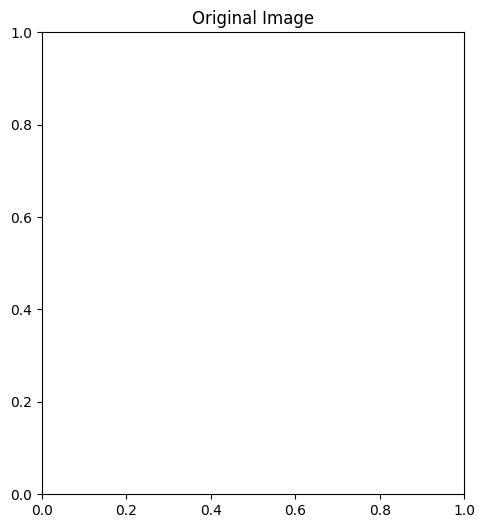

In [21]:
import matplotlib.pyplot as plt

# Example index to check
index = 5000


# You can change this index to other values to check different pairs

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_true[index])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Corresponding Mask')
plt.imshow(mask_true[index], cmap='gray')  # Display the mask in grayscale
plt.axis('off')

plt.show()


In [31]:









type(image_true[0])

numpy.ndarray

In [6]:
# Removing empty mask
valid_indices = [i for i, mask in enumerate(mask_true) if mask.max()!=0]
image_true = image_true[valid_indices]
mask_true = mask_true[valid_indices]

In [7]:
image_true.shape

(1322, 256, 256, 3)

In [8]:
from datasets import Dataset
from PIL import Image

dataset_dict = {
    'image': [Image.fromarray(img) for img in image_true],
    'mask': [Image.fromarray(img) for img in mask_true]
}

dataset = Dataset.from_dict(dataset_dict)

In [9]:
dataset

Dataset({
    features: ['image', 'mask'],
    num_rows: 1322
})

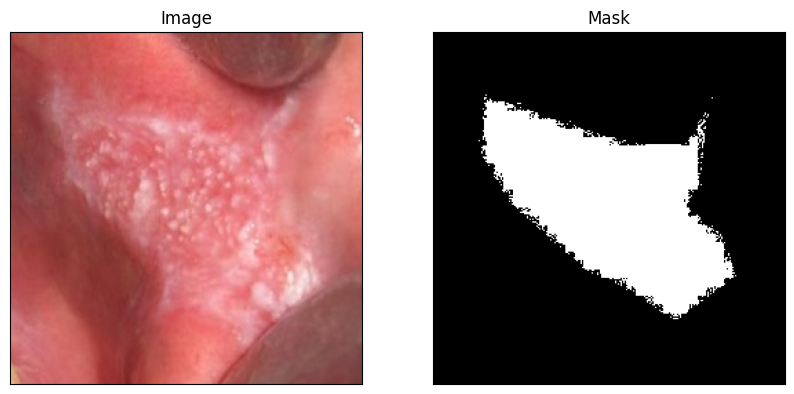

In [10]:
img_num = np.random.randint(0, image_true.shape[0]-1)
example_image = dataset[img_num]["image"]
example_mask = dataset[img_num]["mask"]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image on the left
axes[0].imshow(np.array(example_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(example_mask, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

In [19]:
#Get bounding boxes from mask.
def get_bounding_box(ground_truth_map):
  # get bounding box from mask
  y_indices, x_indices = np.where(ground_truth_map > 0)
  x_min, x_max = np.min(x_indices), np.max(x_indices)
  y_min, y_max = np.min(y_indices), np.max(y_indices)
  # add perturbation to bounding box coordinates
  H, W = ground_truth_map.shape
  x_min = max(0, x_min - np.random.randint(0, 20))
  x_max = min(W, x_max + np.random.randint(0, 20))
  y_min = max(0, y_min - np.random.randint(0, 20))
  y_max = min(H, y_max + np.random.randint(0, 20))
  bbox = [x_min, y_min, x_max, y_max]
  # bbox = [0, 0, 256, 256]

  return bbox

In [11]:
from torch.utils.data import Dataset

class SAMDataset(Dataset):
  """
  This class is used to create a dataset that serves input images and masks.
  It takes a dataset and a processor as input and overrides the __len__ and __getitem__ methods of the Dataset class.
  """
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["mask"])

    # get bounding box prompt
    # prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    # input_boxes=[[prompt]]
    inputs = self.processor(image, return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [21]:
# train_new_leukoplakia_ds = NewLeukoplakiaDataset(new_train_image_paths,new_train_segmentations, transform=train_transforms)
# val_new_leukoplakia_ds = NewLeukoplakiaDataset(new_val_image_paths,new_val_segmentations, transform=val_transforms)

In [12]:
import torch

In [13]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

2024-04-14 05:14:37.189298: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-14 05:14:37.210248: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 05:14:37.210268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 05:14:37.210282: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 05:14:37.214311: I tensorflow/core/platform/cpu_feature_g

In [14]:
# Create an instance of the SAMDataset
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [15]:
# train_set = torch.utils.data.ConcatDataset([train_dataset, train_new_leukoplakia_ds])

In [16]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
ground_truth_mask (256, 256)


In [17]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [18]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  print(k,v.shape)

pixel_values torch.Size([2, 3, 1024, 1024])
original_sizes torch.Size([2, 2])
reshaped_input_sizes torch.Size([2, 2])
ground_truth_mask torch.Size([2, 256, 256])


In [19]:
batch["ground_truth_mask"].shape

torch.Size([2, 256, 256])

In [20]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

In [21]:
from torch.optim import Adam
import monai
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [22]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

#Training loop
num_epochs = 50

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

save_model = 0

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    save_model+=1
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      # input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    if save_model%10 == 0:
      torch.save(model.state_dict(), "/home/interns/Desktop/sandipan/MED_SAM_ROI_All_Data.pth")
    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 0
Mean loss: 0.7394038352455927


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 1
Mean loss: 0.5968950977619405


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 2
Mean loss: 0.5547219791904701


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 3
Mean loss: 0.5285810635012325


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 4
Mean loss: 0.5062987936066067


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 5
Mean loss: 0.49370072017819727


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 6
Mean loss: 0.47675912614218585


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 7
Mean loss: 0.4664098502062092


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 8
Mean loss: 0.459603780471972


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 9
Mean loss: 0.452233843877348


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 10
Mean loss: 0.43631954482121116


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 11
Mean loss: 0.4271245501631147


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 12
Mean loss: 0.4213964073452394


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 13
Mean loss: 0.4081999937497902


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 14
Mean loss: 0.4054694264766488


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 15
Mean loss: 0.40051469317272465


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 16
Mean loss: 0.39269441206137823


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 17
Mean loss: 0.39384244885098374


100%|█████████████████████████████████████████| 661/661 [03:55<00:00,  2.80it/s]


EPOCH: 18
Mean loss: 0.39442375922257167


100%|█████████████████████████████████████████| 661/661 [03:59<00:00,  2.76it/s]


EPOCH: 19
Mean loss: 0.38555541713461394


100%|█████████████████████████████████████████| 661/661 [03:55<00:00,  2.81it/s]


EPOCH: 20
Mean loss: 0.3694578637333753


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.81it/s]


EPOCH: 21
Mean loss: 0.3725539190235369


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 22
Mean loss: 0.3593033197111874


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 23
Mean loss: 0.356783204806374


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.81it/s]


EPOCH: 24
Mean loss: 0.3448096083282703


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 25
Mean loss: 0.34808859226833494


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 26
Mean loss: 0.34179207270066064


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 27
Mean loss: 0.3390191876626772


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 28
Mean loss: 0.34056685932555464


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 29
Mean loss: 0.327022748211689


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 30
Mean loss: 0.3183506087438061


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 31
Mean loss: 0.31485280789062947


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 32
Mean loss: 0.3222563304401562


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 33
Mean loss: 0.3102034598408597


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 34
Mean loss: 0.3192460035817886


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 35
Mean loss: 0.30504061552201384


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 36
Mean loss: 0.300445924052312


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 37
Mean loss: 0.29476027713691233


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 38
Mean loss: 0.29236113360086835


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.84it/s]


EPOCH: 39
Mean loss: 0.2906107549723266


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 40
Mean loss: 0.28947855996562566


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 41
Mean loss: 0.28223101262696393


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 42
Mean loss: 0.2801099972131573


100%|█████████████████████████████████████████| 661/661 [03:53<00:00,  2.83it/s]


EPOCH: 43
Mean loss: 0.2758293894546476


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 44
Mean loss: 0.27372598820527994


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.82it/s]


EPOCH: 45
Mean loss: 0.27882214014541


100%|█████████████████████████████████████████| 661/661 [03:55<00:00,  2.80it/s]


EPOCH: 46
Mean loss: 0.2692384480438146


100%|█████████████████████████████████████████| 661/661 [03:54<00:00,  2.81it/s]


EPOCH: 47
Mean loss: 0.2668587579511658


100%|█████████████████████████████████████████| 661/661 [04:02<00:00,  2.72it/s]


EPOCH: 48
Mean loss: 0.27246463062092324


100%|█████████████████████████████████████████| 661/661 [04:16<00:00,  2.58it/s]


EPOCH: 49
Mean loss: 0.26256408931267605


In [23]:
torch.save(model.state_dict(), "/home/interns/Desktop/sandipan/MED_SAM_ROI_All_Data.pth")

In [ ]:
from transformers import SamModel, SamConfig, SamProcessor
import torchMain Gate Road

In [ ]:
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
my_model = SamModel(config=model_config)
my_model.load_state_dict(torch.load("/home/interns/Desktop/sandipan/MED_SAM1_full.pth"))

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
my_model.to(device)

In [ ]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt

idx = random.randint(0, image_true.shape[0] - 1)

test_image = dataset[idx]["image"]
ground_truth_mask = np.array(dataset[idx]["mask"])
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_model.eval()
Main Gate RoadMain Gate Road
# forward pass
with torch.no_grad():
    outputs = my_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Plot the second image on the right
axes[3].imshow(ground_truth_mask)  # Assuming the second image is grayscale
axes[3].set_title("Ground Truth Mask")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()



In [ ]:
# Model Evaluation


test_image_path = '/home/interns/Desktop/sandipan/OPMD_FULL_Split/Test/Images'
test_mask_path = '/home/interns/Desktop/sandipan/OPMD_FULL_Split/Test/Masks'

images = sorted(os.listdir(test_image_path))
masks = sorted(os.listdir(test_mask_path))

image_test = [cv.cvtColor(cv.imread(os.path.join(test_image_path, image)), cv.COLOR_BGR2RGB) for image in images]
mask_test = [cv.cvtColor(cv.imread(os.path.join(test_mask_path, mask)), cv.COLOR_BGR2GRAY) for mask in masks]

image_test = np.array([cv.resize(image, (256,256), interpolation = cv.INTER_LANCZOS4) for image in image_test])
mask_test = np.array([(cv.resize(mask, (256,256), interpolation = cv.INTER_LANCZOS4)).astype(np.uint8) for mask in mask_test])



In [ ]:

random_number = random.randint(0, image_test.shape[0] - 1)

test_image = Image.fromarray(image_test[random_number])
test_mask = (mask_test[random_number]/255).astype(np.uint8)

inputs = processor(test_image, return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}
my_model.eval()

#forward pass
with torch.no_grad():
    outputs = my_model(**inputs, multimask_output=False)

#apply sigmoid
single_patch_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
single_patch_prob = single_patch_prob.cpu().numpy().squeeze()
single_patch_prediction = (single_patch_prob > 0.1).astype(np.uint8)



fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image))  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(single_patch_prob)  # Assuming the second image is grayscale
axes[1].set_title("Probability Map")

# Plot the second image on the right
axes[2].imshow(single_patch_prediction, cmap='gray')  # Assuming the second image is grayscale
axes[2].set_title("Prediction")

# Plot the second image on the right
axes[3].imshow(test_mask)  # Assuming the second image is grayscale
axes[3].set_title("Ground Truth Mask")
# print(accuracy_score(test_mask, single_patch_prediction))

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()

In [ ]:
from evaluation_metrics import percent_overlap, IOU, dice_coefficient

In [ ]:
def is_binary_mask(mask):
    # Check if all elements are either 0 or 1
    if np.all(np.logical_or(mask == 0, mask == 1)):
        # Check if the data type is integer or boolean
        if np.issubdtype(mask.dtype, np.integer) or mask.dtype == np.bool_:
            # Check if unique values are only 0 and 1
            unique_values = np.unique(mask)
            if len(unique_values) == 2 and 0 in unique_values and 1 in unique_values:
                return True
    return False

def make_binary_mask(mask):
  _, binary_mask = cv.threshold(mask, 0, 1, cv.THRESH_BINARY)
  return binary_mask

In [ ]:
from transformers import SamModel, SamConfig, SamProcessor
import torch
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
model_processor = SamProcessor.from_pretrained("facebook/sam-vit-base")
MedSAM = SamModel(config=model_config)
MedSAM.load_state_dict(torch.load("/home/interns/Desktop/sandipan/MED_SAM1.pth"))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
MedSAM.to(device)

In [ ]:
percent_overlap_score = []
IOU_score = []
dice_score = []
c = 0

for i in range(len(image_test)):

    test_image = image_test[i]
    test_mask = (mask_test[i]/255).astype(np.uint8)
    print(test_image.shape)
    
    inputs = model_processor(test_image, retrun_tensor = "pt")
    # print(inputs.items())

    inputs = {k: v.to(device) for k, v in inputs.items()}
    MedSAM.eval()

    with torch.no_grad():
        outputs = MedSAM(**inputs, multimask_output =False)

    prob = torch.sigmoid(outputs.pred_mask.squeeze(1))
    prob = prob.cpu().numpy().squeeze()
    mask = (prob > 0.2).astype(np.uint8)

    mask_true = make_binary_mask(test_mask)
    print(is_binary_mask(mask_true))
    print(is_binary_mask(mask))

    break

    

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    # Flatten the arrays to compute global metrics
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat, zero_division=0)
    recall = recall_score(y_true_flat, y_pred_flat, zero_division=0)
    f1 = f1_score(y_true_flat, y_pred_flat, zero_division=0)
    # iou = calculate_iou(y_true, y_pred)
    
    return accuracy, precision, recall, f1

# Initialize lists to hold the metric values for each test sample
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
iou_scores = []

# Assuming `test_mask` is the ground truth and `single_patch_prediction` is the prediction from the model
# Loop over your entire test dataset to fill the lists with metrics
# Here's an example for a single prediction for demonstration purposes
metrics = calculate_metrics(test_mask, single_patch_prediction)

# Unpack metrics
accuracy, precision, recall, f1= metrics

# Append to lists
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
# iou_scores.append(iou)

# Calculate average metrics across all test samples
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)
# average_iou = np.mean(iou_scores)

# Print the averages
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1}")
# print(f"Average IOU: {average_iou}")



In [ ]:
def calculate_extended_metrics(y_true, y_pred):
    # Flatten the arrays for computation
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat, zero_division=0)
    recall = recall_score(y_true_flat, y_pred_flat, zero_division=0)
    f1 = f1_score(y_true_flat, y_pred_flat, zero_division=0)
    #iou = calculate_iou(y_true, y_pred)
    
    # Dice coefficient, also known as F1 score for segmentation
    dice = 2 * (precision * recall) / (precision + recall + 1e-6)
    
    # True Positive Rate (Sensitivity) and Specificity calculations
    true_positive = np.logical_and(y_true, y_pred).sum()
    false_positive = np.logical_and(np.logical_not(y_true), y_pred).sum()
    true_negative = np.logical_and(np.logical_not(y_true), np.logical_not(y_pred)).sum()
    false_negative = np.logical_and(y_true, np.logical_not(y_pred)).sum()
    
    sensitivity = true_positive / (true_positive + false_negative + 1e-6)
    specificity = true_negative / (true_negative + false_positive + 1e-6)

    return accuracy, precision, recall, f1, dice, sensitivity, specificity

# Example usage for a single prediction
metrics = calculate_extended_metrics(test_mask, single_patch_prediction)

# Unpack metrics
accuracy, precision, recall, f1,  dice, sensitivity, specificity = metrics

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
#print(f"IOU: {iou}")
print(f"Dice Coefficient: {dice}")
print(f"Sensitivity (True Positive Rate): {sensitivity}")
print(f"Specificity (True Negative Rate): {specificity}")


In [ ]:
def calculate_mean_iou(y_trues, y_preds):
    iou_scores = []
    for y_true, y_pred in zip(y_trues, y_preds):
        iou_score = calculate_iou(y_true, y_pred)
        iou_scores.append(iou_score)
    mean_iou = np.mean(iou_scores)
    return mean_iou

# Assuming `test_masks` is an array of your ground truth masks and `predictions` is an array of your predicted masks
# You would replace this with the actual way you're generating predictions
predictions = [single_patch_prediction for _ in range(len(test_mask))]  # Example, replace with actual prediction logic

mean_iou = calculate_mean_iou(test_mask, predictions)
print(f"Mean IoU: {mean_iou}")


In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(test_images, ground_truths, predictions, num_samples=3):
    fig, axs = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))
    for i in range(num_samples):
        axs[i, 0].imshow(test_images[i])
        axs[i, 0].title.set_text('Test Image')
        axs[i, 1].imshow(ground_truths[i], cmap='gray')
        axs[i, 1].title.set_text('Ground Truth Mask')
        axs[i, 2].imshow(predictions[i], cmap='gray')
        axs[i, 2].title.set_text('Predicted Mask')
        for ax in axs[i]:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Randomly select a few samples to visualize
indices = np.random.choice(range(len(test_mask)), size=3, replace=False)
sample_images = [test_image[i] for i in indices]  # Assuming `test_images` is your list of test images
sample_gt_masks = [test_mask[i] for i in indices]
sample_predictions = [predictions[i] for i in indices]

visualize_predictions(sample_images, sample_gt_masks, sample_predictions)

In [ ]:
import numpy as np

def calculate_iou(y_true, y_pred):
    """
    Calculate the Intersection over Union (IoU) score.
    
    :param y_true: Ground truth mask.
    :param y_pred: Predicted mask.
    :return: IoU score.
    """
    # Ensure boolean logic; cast to bool if not already
    y_true = y_true.astype(bool)
    y_pred = y_pred.astype(bool)
    
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
